<h2 align="center">Components of Machine Learning</h2>

<br>
<br>
<center>CS-EJ3211 Machine Learning with Python 29.5.-17.7.2023</center>
<center>Aalto University (Espoo, Finland)</center>
<center>fitech.io (Finland)</center>

Machine learning (ML) studies methods that enable a computer to learn from data. ML methods fit models to data in order to be able to make accurate predictions and/or inferences about phenomena such as the weather or the behavior of humans. The range of ML applications is overwhelming. ML methods can predict the grade of a cancerous tumour based on histological images or identify the main customer segments of a shop.

This notebook introduces some basic concepts behind many ML methods. A main theme of this course is how ML is obtained by combining **three main components**: 


1. **Data** that consists of basic units of information called **data points**. Data points are defined by their properties which we roughly divide into two fundamentally different groups. 
 * The first group of properties is referred to as the **features** of a data point. Each data point is characterized by (typically a lot of) features, which we stack into a feature vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. Features are properties of a data point that can be measured or computed in an automated fashion without requiring extensive human supervision. Consider data points representing smartphone snapshots. Each snapshot can be characterized by the red, green and blue intensities of each pixel as its features. 
 * Another group of properties that characterizes individual data points is referred to as **labels**. The label $y$ of a data point typically represents some higher-level fact or quantity of interest. In contrast to features, the label of a data point can often only be determined by a human expert. Consider a data point representing a smartphone snapshot. We could then define the label of this datapoint as $y=1$ if the snapshot contains a cat or $y=0$ if the snapshot does not contain a cat. We speak of **regression** problems when data points have numeric labels $y \in \mathbb{R}$ and of **classification** problems when the labels take on values only from a finite set such as $y \in \{0,1\}$ or $y \in \{"\mbox{cat image}","\mbox{not a cat image}"\}$. 


2. A **hypothesis space** that contains (many) different hypothesis or predictor maps $h(\mathbf{x})$. 


3. A **loss function** that measures the quality of a prediction output by a predictor function.

ML methods learn by searching the hypothesis space for a predictor function that results in the smallest average loss on a (training) dataset. We will demonstrate how Python libraries such as NumPy, Matplotlib, and Scikit-learn can be used to implement the components of ML methods. The ultimate goal of this notebook is to equip you with all the skills required to implement a complete ML mehtod in Python. 

<img width=500 src="../../../coursedata/1_ComponentsML/AMLProblem.png"/>

### Learning Goals

* Learn to find useful definitions for data points, their features, and labels for some real-life application. 
* Learn how to represent numeric data as NumPy arrays (Python representation of vectors and matrices).    
* Learn to use ("toy") datasets provided by the Python library `scikit-learn`. 
* Learn about the concept of a hypothesis spaces. 
* Learn how to fit a linear hypothesis (straight line) to data. 

This notebook contains several student tasks requiring you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.

### Reading

Chapters 1-2 of ["Machine Learning: The Basics"](https://github.com/alexjungaalto/MachineLearningTheBasics/blob/master/MLBasicsBook.pdf).

## Data (features and labels)

ML methods learn a hypothesis that allows to predict some phenomenon such as the next days temperature or the shopping behaviour of customers. The learning is based on continuously adapting the hypothesis based on the discrepancy between its predictions and actual observed **data**. 

ML methods view data as collections of atomic units of information called **data points**. A data point can represent very different things or objects. Data points might represent different days, different countries, different persons or different planets. The concept of data points is very abstract and, in turn, highly flexible. However, it is important to clearly define the meaning of data points when starting to develop ML applications.

ML methods rarely have complete information about a data point but can only access a small number of properties or **features** $\left(x_1, x_2, \ldots, x_n \right)$. Features are properties of a data point which can be measured easily in an automated fashion. Maybe the most important characteristic of features is that they can be determined without requiring human experts. Another type of properties of data points are referred to as **labels**. We can think of the label of a data point as some higher-level information or quantity of interest. In contrast to features, labels are properties of data points that can often be determined only with the help of human experts. We refer to data points whose labels are known as **labeled data**.

ML can *roughly* be divided into **supervised**- and **unsupervised** learning. Supervised learning is applied to problems in which we attempt to predict the label $y$ of data points based on its features, and requires access to a set of labeled data. A supervised ML model uses the labeled data points as examples to learn a predictor function $h(\mathbf{x})$ that takes the features $\mathbf{x}$ of a data point as input and outputs a predicted label $\hat{y} = h(\mathbf{x})$. The trained model can then be used to predict the labels of data points for which the true labels are unknown.

In contrast to supervised methods, unsupervised methods do not require the data to be labeled and are in general used for problems related to the structure and distribution of the data. Examples of unsupervised ML methods are clustering algorithms, which aim to identify different clusters of data points in the dataset, and generative models that are used to generate data (see this [cool example](https://www.youtube.com/watch?v=kSLJriaOumA)).

### Example: Features and Labels 

Let us illustrate the main ML terminology using a concrete example. Imagine that we want to build a model for classifying songs according to their genre (such as "Pop", "Blues" or "Hip-Hop"). In this case, the **data points** are songs, with each song corresponding to a specific data point. The data points (=songs) are characterized by the **features** of the data point, which in this case are the city where the song was produced, the length of the song's lyrics, its tempo, and the power spectrum of the audio signal. The quantity of interest or **label** is in this case the genre to which the song belongs to. 

In order to train a machine learning model to predict the genre (class) of different songs (data points), we need a labeled training dataset consisting of songs for which the genre is known. This dataset can then be used as the input to a supervised ML algorithm, which learns a predictor $h(\mathbf{x}) = \hat y$ that maps the features of a song to a predicted label.

Any machine learning scenario requires some degree of domain-specific knowledge.
No matter how big, well collected and noise-free dataset we had for, say, daytime temperatures and air humidity in Rovaniemi (features), we could not use it to train an effective model to predict the number of euros in Alex's bank account (labels). When choosing features for a particular learning problem, some background assumptions (implicit or explicit) have to be made about the connection between features and labels - we can not learn a pattern that doesn't exist. In real-life scenarios, the exact relationship between features and labels is of course unknown - that is what we are trying to learn. Ideally, we might like to work with features we know are all relevant to the learning task at hand. However, more often than not we have to (and even want to) include a large number of features without any certainty that they are all even relevant or informative. Fortunately, many modern ML methods, including many of those we will cover in this course, can still be effective despite partially uninformative or "noisy" features.

### Representing data as Matrices and Vectors
<a id="Q1"></a>

In order to simplify the mathematical presentation as well as the technical implementation of machine learning methods, it is useful to represent data using [vectors and matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

In the vectorized representation, the features of a data point are stored in a **feature vector** $\mathbf{x}$, which is a column vector

\begin{equation}
    \mathbf{x}= \begin{pmatrix}
                  x_{1} & x_{2} & \ldots & x_{n} 
               \end{pmatrix}^T \in \mathbb{R}^n                
\end{equation}

where $x_i, 1 \leq i \leq n,$ denotes the value of the $i$:th feature of the data point. Furthermore, we assume that the data points are indexed and denote the feature vector of the $i$:th data point by $\mathbf{x}^{(i)}, 1 \leq i \leq m$.

It is customary to store the features of the dataset in a **feature matrix** $\mathbf{X}$, in which the $i$:th row contains the feature vector of the $i$:th data point:

\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                    \mathbf{x}^{(1)} \\ \mathbf{x}^{(2)} \\ \vdots \\ \mathbf{x}^{(m)}
                \end{pmatrix} 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}

If the data is labeled, we store the labels of the data points in a separate **label vector** $\mathbf{y}$, which is a column vector where the $i$:th row contains the label of the $i$:th data point:

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  y_{1} & y_{2} & \ldots & y_{m} 
               \end{pmatrix}^T \in \mathbb{R}^m                
\end{equation}


#### Summary of mathematical notation:

- $m$ - number of data points
- $n$ - number of features
- $\mathbf{X}$       - upper-case bold letters denote a matrix
- $\mathbf{x}$       - lower-case bold letters denote a vector   
- $x_{i}$            - $i$:th entry of vector $\mathbf{x}$
- $\mathbf{x}^{(i)}$ - feature vector of $i$:th data point
- $x_{j}^{(i)}$      - $j$:th feature of $i$:th data point
- $\mathbb{R}$       - real numbers
- $\mathbb{R}^{n}$   - [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space) consisting of length-$n$ lists of real numbers 
- $\mathbb{R}^{m \times n}$ - matrices with $m$ rows and $n$ columns of real-valued numbers

A quick refresher for basic properties of matrices can be found under [this link](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470549094.app1).

<div class="alert alert-success">
    
### Column vs Row vectors
    
It is common to represent vectors "by default" as column vectors and [transpose](https://en.wikipedia.org/wiki/Transpose) vectors when needed (e.g. $\mathbf{a}^{T}\mathbf{b}$). See discussion [here](https://math.stackexchange.com/questions/2152329/are-column-vectors-considered-the-default-orientation-in-linear-algebra).
</div>

### Vectors and matrices in NumPy

In Python library NumPy, vectors and matrices (and higher dimensional tensors) are represented by `ndarray`:s. An `ndarray` object is an n-dimensional array of shape `(d_1,d_2,...,d_n)`, where `d_i` is the size of the $i$:th dimension of the array. 

For example, we can represent the label vector $\mathbf{y}$ as an `ndarray` of shape `(m,1)` and the feature matrix $\mathbf{X}$ as an `ndarray` of shape `(m,n)`,  where `m` is the number of data points and `n` the number of features.

Below, you can see how the data in the song genre example would be represented with matrices and vectors.

<img src="../../../coursedata/1_ComponentsML/FeaturesLabels.jpg" alt="Drawing" style="width: 1000px;"/>


<div class="alert alert-success">
    
### Feature vectors
    
On the illustration above you can see two vectors, column 'feature 1' vector and row 'song 1' vector. 
    
- column feature vector contains feature values of 1st feature (e.g. 'City of production) of ***all*** $m$ datapoints  $(x_{1}^{(1)}, x_{1}^{(2)}, \ldots , x_{1}^{(m)}) \in \mathbb{R}^{m}$ .
    
- row feature vector is the feature vector of the 1st datapoint and contains feature values of  ***all*** $n$ features of the 1st datapoint $ \mathbf{x}^{(1)} = (x_{1}^{(1)}, x_{2}^{(1)}, \ldots , x_{n}^{(1)}) \in \mathbb{R}^{n}$.
</div>



In [1]:
# Import necessary Python libraries

import matplotlib.pyplot as plt                    # plotting
import numpy as np                                 # arrays operations (vectors, matrices)
import pandas as pd                                # data handling and visualization
from sklearn import datasets                       # sklearn.datasets module includes utilities to load datasets
from sklearn.linear_model import LinearRegression  # ML linear models

<a id='npDataDemo'></a>
<div class=" alert alert-info">
    
### Demo. Vectors and matrices in NumPy.  
    
In the code below, we create a couple of `ndarrays` representing vectors and matrices in NumPy and access parts of these using NumPy indexing. Notice that Python uses 0-based indexing - for example, the element in the first row and second column in a matrix is located at index `[0,1]` in the corresponding `ndarray`.
    
More information about NumPy can be found in the 0_Intro.ipynb notebook or in tutorial ["NumPy: the absolute basics for beginners"](https://numpy.org/devdocs/user/absolute_beginners.html).
</div>

In [2]:
# Create a matrix A and column vector b
A = np.array([[1,2,3],[4,5,6]])
b = np.array([[6,7,9]]).T

# Print matrix and vector
print(f"A = \n{A}")
print(f"b = \n{b}\n")

# Use the .shape attribute to get the shapes of A and b
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}\n")

# Get the element in the second row and first column of A
print(f"A_2_1 = {A[1,0]}\n")

# Get second column of A 
print(f"Second column of A = {A[:,1]}\n")

# Get first row of A 
print(f"First row of A = {A[0]}\n")

# Get columns 2 and 3 of A
print(f"Second and third column of A =\n{A[:,1:3]}\n")

A = 
[[1 2 3]
 [4 5 6]]
b = 
[[6]
 [7]
 [9]]

Shape of A: (2, 3)
Shape of b: (3, 1)

A_2_1 = 4

Second column of A = [2 5]

First row of A = [1 2 3]

Second and third column of A =
[[2 3]
 [5 6]]



<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
    
### Student task 1.1. Feature matrix in NumPy
    
This task tests your knowledge on the structure of the feature matrix $\mathbf{X}$ and array indexing in NumPy.
    
The code snippet first creates a "feature matrix" containing a range of numbers. After this, your task is to
    
- Store a vector containing the values of the first feature of the feature matrix in the variable `a`.
    
- Store the feature vector of the 10th data point in the variable `b`
    
- Store a matrix containing the 2nd and 3rd features of 10th, 11th, $\ldots$, 14th data points in the variable `c`.
    
**Hint:** Remember that indexing starts from zero in Python! For example, the first data point is stored in the row with index 0, etc.
</div>

In [12]:
# Define the feature matrix 
X = np.arange(1,101).reshape(20,5) 

### STUDENT TASK ###
a = X[:, 0] 
b = X[9, :] 
c = X[9:14, 1:3]
# YOUR CODE HERE


print(f"Shape of X: {X.shape}")
print(f"Shape of a: {a.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of c: {c.shape}")

Shape of X: (20, 5)
Shape of a: (20,)
Shape of b: (5,)
Shape of c: (5, 2)


In [13]:
# Perform some sanity checks on the solution

# Check arrays' shapes
assert a.shape == (20,), "The shape of a is incorrect!"
assert b.shape == (5,), "The shape of b is incorrect!"
assert c.shape == (5, 2), "The shape of c is incorrect!"

# Additional checks
assert sum(a) == 970, "Array `a` is wrong!"
assert sum(b) == 240, "Array `b` is wrong!"
assert sum(c.flatten()) == 575, "Array `c` is wrong!"

print("Sanity checks passed!")

Sanity checks passed!


In [5]:
# hidden tests


In [6]:
# hidden tests


In [7]:
# hidden tests


### Loading datasets in NumPy with Pandas

Within this course we will focus on ML methods that have ready-to-use implementations provided in the Python library **scikit-learn**. These methods build on the Python package **NumPy** which provides methods for processing numeric data. The most important data type for representing numeric vectors or matrices are **NumPy Arrays**. Hence, to make good use of the ML methods provided by scikit-learn we first have to get familiar with loading data into NumPy arrays. 

In this section, you will learn how to load a dataset using Pandas and how to define the feature matrix and label vector that are used in many scikit-learn models. As an example, we will use a small dataset consisting of the weights and bench press results of students at Aalto university, and consider the weight as the feature and the bench press result as the label of the data points.

<a id='pdDataDemo'></a>
<div class=" alert alert-info">

### Demo. Loading a dataset with Pandas.  
    
The code snippet below loads the bench press dataset using Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)) function `read_csv`. The function creates a Pandas DataFrame based on the data, and uses the top row to define the column names.
    
In order to define the feature matrix `X` and label vector `y`, we first select the corresponding data from the dataframe, and then convert it into `ndarray`:s by using the `.to_numpy()` function.
</div>

In [8]:
path = "../../../coursedata/1_ComponentsML/benchpress.csv"  # Define the file path
df = pd.read_csv(path)  # Load the data as a Pandas DataFrame

X = df['Bodyweight'].to_numpy().reshape(-1,1)  # Define the feature matrix
y = df['Benchpress'].to_numpy()  # Define the label vector

# Print first five values of X and y
print(f"First five values of X (weights of students):\n {X[:5]} \n")
print(f"First five values of y (bp results of students):\n {y[:5]}")

First five values of X (weights of students):
 [[68.72700594]
 [97.53571532]
 [86.59969709]
 [79.93292421]
 [57.80093202]] 

First five values of y (bp results of students):
 [ 45.82560525 111.9390433   80.88996529  75.52398007  37.67579885]


<div class="alert alert-success">
    
### [Numpy reshape function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
    
Above we used numpy `.reshape()` function to construct a feature vector:
    
`X = df['Bodyweight'].to_numpy().reshape(-1,1)`
    
One dimension in the reshape function is set to -1, instead of `.reshape(dim1, dim2)`. In this case, this dimention is inferred from the length of the array and remaining dimensions, i.e. dim1 = len(X.flatten()) / dim2.
    
Numpy function [`.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) return a copy of the array collapsed into one dimension.

</div>

In [9]:
# Create matrix of shape (2, 6)
A = np.random.rand(2, 6)
print(f"matrix A:\n {A}")
print(f"\nShape of A:\n {A.shape}")

# Flatten matrix A
print(f"\n Flattened matrix A:\n {A.flatten()}")
print(f"\nNumber of elements in A:\n {len(A.flatten())}")

# Create matrix B by reshaping matrix A.
# matrix B has the same number of elements as matrix A, 2*6=12
# 2nd dimension of matrix B has 4 elements
# then 1st dimension will have 12/4=3 elements
B = A.reshape(-1,4)
print(f"\nmatrix B:\n {B}")
print(f"\nShape of B:\n {B.shape}")

matrix A:
 [[0.6188296  0.28743849 0.12155847 0.47103419 0.07903465 0.73472012]
 [0.73790889 0.01734517 0.3905651  0.78725505 0.82200255 0.36692888]]

Shape of A:
 (2, 6)

 Flattened matrix A:
 [0.6188296  0.28743849 0.12155847 0.47103419 0.07903465 0.73472012
 0.73790889 0.01734517 0.3905651  0.78725505 0.82200255 0.36692888]

Number of elements in A:
 12

matrix B:
 [[0.6188296  0.28743849 0.12155847 0.47103419]
 [0.07903465 0.73472012 0.73790889 0.01734517]
 [0.3905651  0.78725505 0.82200255 0.36692888]]

Shape of B:
 (3, 4)


<div class="alert alert-success">
    
### Auto/\<tab\> completion
Jupyter notebooks support auto-completion: you can save some coding time, and reference look-ups, by using \<tab\> to complete code/commands you've started to write. E.g., start writing a couple of the first letters of `print()` function, press \<tab\>, and the auto-complete should either show you all the possible completions or complete the command if it's unambiguous.

For jupyter notebooks it is adviced to put `%config Completer.use_jedi = False` in the first cell in the case if autocomplete is slow.
</div>

### Datasets in Scikit-Learn

When solving real-life ML problems, you will have to import your own data into the Python environment by using, for example, the methods shown above. However, the Python library scikit-learn also comes with functions for loading a few standard datasets, which can be useful for testing different ML methods or honing your ML skills. These datasets include some small built-in [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html), 
such as the [iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) and [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset) datasets for classification and the [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn-datasets-load-diabetes) and [linnerud](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset) datasets for regression, but also larger [real world datasets](https://scikit-learn.org/stable/datasets/real_world.html#real-world-datasets) that are downloaded only when calling a fetching function.

The scikit-learn datasets are stored in a [`bunch` data type](https://pypi.org/project/bunch/) containing multiple key-value pairs, similar to the ones in a Python `dictionary`. The main difference between the two data types is that the `bunch` type enables accessing values through attributes named in accordance with the keys (i.e. `bunch['key'] == bunch.key`).

All scikit-learn datasets include a feature matrix with key `'data'` and a target (label) vector with the key `'target'`, as well as a description of the dataset with the key `DESCR`. Also, the `Bunch` objects might contain other items as well, such as `feature_names` and `target_names` containing the names of the features and targets of the data points respectively. 

### Example problem: Predicting the number of chin-ups based on an athlete's weight

Now, we consider an example ML problem that we will later solve using a ML model in Scikit-learn. In this problem, our task is to predict the number of chin-ups that an athlete is able to do, based on his/her weight. Here, the data points represent athletes, the only feature is the weight of the athlete, and the label is the number of chin-ups the athlete is able to perform. The goal is to solve this problem by using ML to find a predictor function $h(x)$ that predicts the number of chin-ups based on the weight of the athlete.

We can obtain data for training our model from the **["Linnerud" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)**, which contains the physiological parameters (Weight, Waist, and Puls) and exercise data (Chin-ups, Situps, and Jumps) of 20 athletes. In the dataset description, the exercise data is referred to as features, while the physiological parameters are defined as the labels of datapoints (athletes). ***However, in practice, one can freely define which variables are features and which are labels.***

<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
   
### Student task 1.2. Loading the data for chin-up prediction.  
    
In this task your objective is to create a function that returns a feature matrix `X` containing the weights (in kg) of the 20 athletes in the linnerud dataset, and a label vector `y` containing the number of chin-ups of the respective athletes. The feature matrix should be of shape `(20,1)` and the label vector of shape `(20,)`.
    
The steps you have to code are as follows:
    
- Load the linnerud data using the function `datasets.load_linnerud()` and store it in a variable named `linnerud`
    
    
- Store the athlete weights in a feature matrix `X`. The athlete weights are located in the first column of the matrix `linnerud.target`. Furthermore, convert the weights in `X` to kg by multiplying `X` with the conversion factor `CF`and reshape `X` to shape `(20,1)` by using the function `X.reshape(m,n)` with suitable arguments `m,n`
    
    
- Store the nr. of chin-ups in a label vector `y`. The nr. of chin-ups are located in the first column of the matrix `linnerud.data`
    
    
Note, that both, the athlete weights and nr. of chin-ups, are properties of the datapoint and can serve as a feature or a label, dependent on what you want to predict (quantity of interest). Here we use the athlete weights as features (although it is labeled as target in sklearn dataset) and the label (quantity of interest) is the nr. of chin-ups.

</div>

In [14]:
# conversion factor
CF = 0.453

def get_chinup_data():
    ### STUDENT TASK ###
    linnerud = datasets.load_linnerud()                # load the linnerud dataset into the bunch object "linnerud"
    X = linnerud.target[:, 0].reshape(-1, 1)           # get weight values and reshape to (-1,1) or (20,1)
    X = X*CF                                           # convert weight values to kg 
    y = linnerud.data[:, 0]                            # get nr. of chin-ups
    # YOUR CODE HERE
    
    return X, y

X, y = get_chinup_data()

In [15]:
# Perform some sanity checks on the solutions
assert X.shape == (20,1), "The shape of the feature matrix is wrong!"
assert y.shape == (20,), "The shape of the target vector is wrong!"

print("Sanity checks passed!")

Sanity checks passed!


In [16]:
# hidden tests


In [17]:
# hidden tests


### Visualizing Data

Before considering how ML models learn from data, we will briefly examine how to visualize data using the [Matplotlib](https://matplotlib.org/) library in Python. Visual exploration of the dataset is often beneficial before applying ML methods since it can aid in identifying relationships between the variables in the data.

The [scatterplot](https://en.wikipedia.org/wiki/Scatter_plot) is a particularly useful tool for visualizing a dataset containing discrete data points. The scatterplot visualizes the data with respect to two different variables and can be used to assess the relationship between a single feature and the label, or the relationship between two distinct features. Another useful plot type is the [histogram](https://en.wikipedia.org/wiki/Histogram), which is often used for visualizing the sample distribution of the data with respect to a single numerical variable.

<a id='plotpdDemo'></a>
<div class=" alert alert-info">
    
### Demo. Plotting a scatterplot with Matplotlib.  
    
In the code snippet below, we plot a scatterplot of the weight and nr. of chin-ups of the 20 athletes in the Linnerud dataset, using the `plt.scatter()` function in Matplotlib.
    
You can consult the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) of `plt.scatter()` for information on different options available for plotting, as well as further examples that show how to create more sophisticated scatterplots. 
</div>

In [ ]:
# Load Linnerud data and select the physical attributes as the features and labels
x, y = get_chinup_data()

plt.rcParams['axes.labelsize'] = 16 # Set fontsize of labels 
plt.rcParams['axes.titlesize'] = 16 # Set fontsize of title

plt.figure(figsize=(8,5))  # Set size of figure
plt.scatter(x, y)          # Make a scatterplot of the weights vs. chin-ups
plt.title("Weight vs. nr. of Chin-ups")  # Set title
plt.xlabel("Weight")    # Set x-axis label 
plt.ylabel("Chin-ups")  # Set y-axis label  
plt.show()

## Hypothesis Space 

When applying a ML model on labeled data, we want the model to learn a predictor function $h(\mathbf{x})$ that takes the features of a data point as input and outputs a predicted label $\hat{y}$. Ideally, we would like our ML model to be able to learn any possible function so that it can find the one that best represents the relationship between the features and the label. This is, however, impossible in practice, and therefore we have to restrict the set of functions that the ML model can learn. This restricted set of predictor functions is referred to as the **hypothesis space**.

The choice of hypothesis space corresponds to an assumption about the relationship between the features and the label of a data point. For example, by selecting the set of linear functions of the form

\begin{equation}
    h(x) = w \cdot x, \; \text{ where } w \in \mathbb{R}
\end{equation}

as the hypothesis space in the chin-up problem, we are effectively assuming that the relationship between the weight and the number of chin-ups can be approximated well using a linear function. It is important to understand that such assumptions can rarely be justified in advance, and it is in practice necessary to experiment with models using different hypothesis spaces to find the one that results in the best predictions.

### Model parameters

As per the example above, let us choose the set of linear functions

\begin{equation}
    h(x) = w \cdot x, \; \text{ where } w \in \mathbb{R}
\end{equation}

as the hypothesis space for the chin-up problem. The predictor functions take as input the weight $x$ of an athlete and return a prediction $\hat{y} = wx$ of the number of chin-ups the athlete can perform. Note that each possible value of the coefficient $w$ corresponds to a particular predictor function, and thus the learning algorithm can search for the best predictor by tuning the value of $w$.

In this example, $w$ is the sole **model parameter** of the ML model. Model parameters are variables that the learning algorithm tunes during the training process in order to find the best predictor function in the hypothesis space. Models with larger hypothesis spaces than our tiny example have a larger number of parameters. An extreme example is the [GPT-3](https://en.wikipedia.org/wiki/GPT-3) deep learning model, which has ~175 billion model parameters!

The figure below shows the optimal predictor for four polynomial hypothesis spaces, as well as the form of the predictor functions in the respective spaces. We can see that whereas the first-degree polynomials in the hypothesis space $\mathcal{H}^{(2)}$ are parametrized by the linear term $w_1$ and intercept $w_0$, the third-degree polynomials in $H^{(4)}$ are parametrized by a larger collection of parameters $(w_0, w_1, w_2, w_3)$. 

<img src="../../../coursedata/1_ComponentsML/Hspace.jpg" alt="Drawing" style="width: 900px;"/>

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    
### Demo. Hypothesis Space of Linear Predictor Functions.  
    
In the code below, we create a scatterplot of the body weight values and number of chin-ups of the athletes in our example problem. In addition, we plot a few of the predictor functions $h(x)=w \cdot x$ in the linear hypothesis space using certain choices of the parameter $w \in \mathbb{R}$.
</div>

In [ ]:
# Load the chinup data
x, y = get_chinup_data()

# Define the coefficients w for the different predictors (0,0.05,...,0.45)
coefficients = np.linspace(0, 0.45, 10)

# Plot the data points and generated predictor functions from the linear hypothesis space
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Create Figure and Axes object

plt.rcParams['axes.labelsize'] = 16 # Set fontsize of labels 
plt.rcParams['axes.titlesize'] = 16 # Set fontsize of title

# Make a scatterplot of the data
axes.scatter(x, y, color='blue', label="data points") 

# Plot the predictor function for each regression coefficient w in `coefficients`
for w in coefficients: 
    y_pred = w*x  # Calculate the predictor function
    label = f"w = {w:.2f}"  # Format the label for the legend
    axes.plot(x, y_pred, label=label)  # Plot the predictor function

axes.set_title('Several different linear predictor functions')  # Set plot title
axes.set_xlabel('body weight (kg)')    # Set x-axis label
axes.set_ylabel('number of chin-ups')  # Set y-axis label
axes.legend(loc='upper left')  # Set location of the legend to show in upper left corner
plt.show()

## Learning by Minimizing Loss

ML methods search for a predictor function in its hypothesis space that accurately predicts the label of any data point. To this end, we define a **loss function** $L((\mathbf{x}, y), h)$, which quantifies the discrepancy between the predicted label $\hat{y}=h(\mathbf{x})$ and the true label $y$ of a data point. The loss function is a design choice that must balance between the computational complexity (some loss functions are easier to minimize) and statistical properties (some loss functions are more robust to outliers in the training data). In general, the loss function value is small if the predicted label is close to the true label. 

We highlight that we need to know the true label value $y$ of a data point to evaluate the loss $L((\mathbf{x}, y), h)$. Most ML methods need to be fed with a set of labeled datapoints $\mathcal{D} = \big\{ \big(\mathbf{x}^{(1)},y^{(1)}\big),\ldots,\big(\mathbf{x}^{(m)},y^{(m)}\big) \big\}$. The dataset $\mathcal{D}$ is referred to as being labeled since it contains datapoints for which we know the true label values. These "labeled" datapoints are then used as a training set by ML method in the following sense. ML methods learn a predictor map $h \in \mathcal{H}$ that incurs minimal **average loss** $\mathcal{E}$ on the training data $\mathcal{D}$, 

\begin{equation}
    \mathcal{E}\big(h|\mathcal{D} \big) = \frac{1}{m} \sum_{i=1}^{m} L \big(y^{(i)}, \underbrace{\hat{y}^{(i)}}_{h\big(\mathbf{x}^{(i)}\big)} \big)
\end{equation}

We slightly abuse notation and use the $L(y, \hat y)$ shorthand for any loss function that depends on the features $\mathbf{x}$ only via the predicted label $\hat y = h(x)$. 
The average loss $\mathcal{E}\big(h|\mathcal{D} \big)$ is the average of the individual losses incurred by using the predictor $h$ to predict the labels of the individual data points in the training set. We sometimes refer to the average loss of a predictor on the training set as the **training error**. 

In general, we are free to define the loss function to best suit the statistical properties of the data and computational resources at hand. However, for certain classes of machine learning problems some useful choices for the loss functions have crystalized. For example, if the labels of data points take on numeric values, a widely used choice for the loss function is the **squared error loss**: 

\begin{equation}
    L(y, \hat y) = (y - \underbrace{\hat y}_{h(\mathbf{x})})^{2}
\end{equation}

We will use this loss function to fit a linear model to the chin-up data in our example problem. In this case, learning the best predictor function corresponds to finding the value of $w$ that minimizes the **mean squared error** (MSE):

\begin{equation}
\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^{2} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - w \cdot {x}^{(i)})^{2}. 
\end{equation}

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    
### Demo. Fitting a Linear Model to the Linnerud data.  
    
The [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression) class in Scikit-learn implements a standard linear regression model. In the code snippet below, we use this class to fit a linear regression model **without an intercept** to the Linnerud data, and use the fitted model to calculate the predicted labels for the training data.
    
The steps we take are the following:
    
- First, we create an instance of the `LinearRegression` class. This is done with the statement `LinearRegression(...)`. When creating this object, we can pass different parameters to the constructor that will affect the functionality of the model. For example, the parameter `fit_intercept` determines whether or not the model includes an intercept in its predictor functions
    
    
- After creating the object and storing it in a variable `reg`, we train the model on the features `X` and labels `y` by calling the function `reg.fit(X, y)`. This function takes the feature matrix and label vectors as arguments, and calculates the optimal model parameters. The optimal regression weights (coefficients) are stored in the `.coef_` attribute of the object.
    
    
- Finally, we use the function `reg.predict(X)` to calculate the predicted labels for the training data. The predicted labels are calculated using the optimal weight `w_opt` that was stored in the `.coef_` attribute after fitting the model.
    
The documentation of the linear regression class can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
</div>

In [ ]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression(fit_intercept=False)  # Initialize the Linear Regression model
reg.fit(x, y)  # Fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x)  # Make predictions based on the fitted model
w_opt = reg.coef_[0]     # Get the optimal regression coefficient

# Print weight of the optimal predictor 
print("Optimal weight w =", w_opt)

Next, we plot the data points along with the optimal predictor function of the model and the predicted labels. Furthermore, we indicate the prediction errors $y-\hat{y}$ with red bars.

In [ ]:
# Create a grid of test feature values 
x_grid = np.linspace(-1, 120, num=100).reshape(-1,1) 
# Compute predictions from linear regression model (without intercept term)
y_grid = reg.predict(x_grid) 

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Create Figure and Axis objects and set figure size
axes.scatter(x, y, label='data points')          # Make a scatterplot of the weights vs. the nr. of chin-ups
axes.scatter(x, y_pred, label='predicted labels', color='black')  # Plot the predicted labels
axes.plot(x_grid, y_grid, color='green', label='optimal linear predictor')  # Plot the linear predictor

# Plot prediction errors
axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(x)-1):  # Loop through range length of x - 1
    lineXdata = (x[i+1], x[i+1])  # Make tuples with same x
    lineYdata = (y[i+1], y_pred[i+1])  # Make tuples with different y's
    axes.plot(lineXdata, lineYdata, color='red')  # Add the red lines to the plot to indicate error distance from our predicted regression model

axes.axhline(y=0, color='k', linestyle=':')  # Add a dotted line y=0 
axes.axvline(x=0, color='k', linestyle=':')  # Add a dotted line x=0 
    
axes.legend(loc='upper right')  # Add legend to the upper right corner
axes.set_xlabel("feature x (body weight)")       # Set x-axis label 
axes.set_ylabel("label y (number of chin-ups)")  # Set y-axis label 
plt.show()

### Adding an Intercept Term 

The hypothesis space consisting of functions $h(x) = wx$ is somewhat restrictive as it can only provide a hypothesis $h$ with $h(0)=0$, i.e., a straight line passing through the origin. For the chin-up prediction task above, this restriction has the consequence that it is impossible to learn a hypothesis that predicts fewer chin-ups for heavier athletes. However, it seems reasonable to learn a hypothesis with exactly such a behavior, i.e., predicting fewer chin-ups for athletes with larger body weight. 

We can easily enlarge the hypothesis space of maps $h(x)=wx$ by allowing an intercept (or offset or bias), i.e., the space of maps 
\begin{equation}
h(x) = w \cdot x + b. 
\end{equation}
Each such map is parametrized by a weight $w$ and an intercept term $b$. By including the intercept term, we allow the predictor functions to cross (intercept) the y-axis at any value $b$ on the axis since $h(0)=b$. Observe that this model has two model parameters - $w$ and $b$. Thus, the model is fitted by minimizing the average squared error of $h(x)$ with respect to both $w$ and $b$.

When including an intercept term, the hypothesis space contains all possible linear functions, instead of only those that cross the origin. Thus, it is always preferable to include the intercept term, except for rare cases where we are pretty sure that we want to learn a hypothesis with $h(0)=0$. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    
### Student Task 1.3. Fitting a Linear Model with and without an intercept. 

Your task is to fit two linear regression models to the Linnerud data, one with an intercept term and one without. The inclusion of the intercept term is controlled by the parameter `fit_intercept`, which takes a boolean value (`True` or `False`) that indicates whether the intercept is included.
    
In addition, you should find the optimal weight $w_{\rm opt}$ for the model without intercept and store it in the variable `w_opt`, and find the optimal weight and intercept for the model with an intercept and store these in the variables `w_opt_intercept` and `intercept` respectively.
    
The necessary steps for fitting each model are presented in detail in the previous demo. To retrieve an intercept value of fitted model, refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
</div>

In [23]:
x, y = get_chinup_data()

### STUDENT TASK ###
# Linear Regression model without an intercept
reg = LinearRegression(fit_intercept=False)
reg.fit(x,y)
w_opt = reg.coef_[0]
#
# Linear Regression model with an intercept term 
reg_intercept = LinearRegression(fit_intercept=True)
reg_intercept.fit(x,y)
w_opt_intercept = reg_intercept.coef_[0]
intercept = reg_intercept.intercept_
#
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE

# Print parameters of the optimal predictors
print(f"model without intercept: optimal weight w_opt = {w_opt}")
print(f"model with intercept: optimal weight w_opt_intercept = {w_opt_intercept} and intercept = {intercept}")

model without intercept: optimal weight w_opt = 0.1114352858702688
model with intercept: optimal weight w_opt_intercept = -0.18418114215330775 and intercept = 24.351322650827086


In [24]:
# Perform sanity check on the results
assert w_opt < 1, "w_opt value is wrong"
assert w_opt_intercept < 50, "w_opt_intercept value is wrong"
assert intercept > -400, "intercept value is wrong"
assert intercept !=0, "intercept value is wrong"

print('Sanity checks passed!')

Sanity checks passed!


In [25]:
# hidden tests


In [26]:
# hidden tests


In [27]:
# hidden tests


Next, we plot a figure of the linnerud data and the optimal predictors found in the previous task.

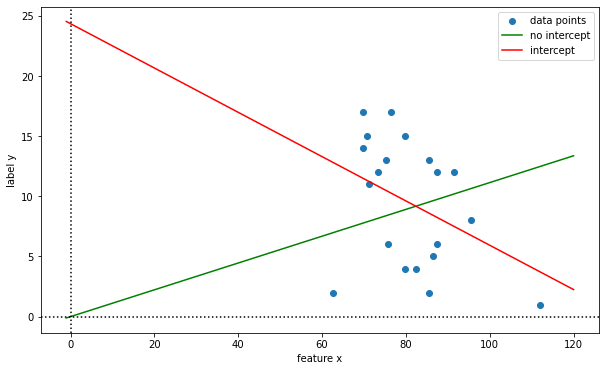

In [28]:
# Create a grid of test feature values  
x_grid = np.linspace(-1, 120, num=100).reshape(-1,1) 
# Compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# Compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Initialize subplots and get "fig" and "axes" variables
axes.scatter(x, y, label='data points')          # Create a scatterplot of the chin-up data
axes.plot(x_grid, y_pred, color='green', label='no intercept')  # Add linear predictor without intercept
axes.plot(x_grid, y_pred_intercept, color='red', label='intercept')  # Add linear predictor with intercept

axes.legend() # Add a legend 
axes.set_xlabel("feature x")  # Add x-axis label 
axes.set_ylabel("label y")    # Add y-axis label 
axes.axhline(y=0, color='k', linestyle=':')  # Add a dotted line 
axes.axvline(x=0, color='k', linestyle=':')  # Add a dotted line 
plt.show()

By observing the figure above, we can see that the inclusion of the intercept leads to very different results and conclusions in the chin-up problem. While the model without the intercept seemed to suggest that heavier athletes are, on average, able to do more chin-ups than their lighter counterparts, the model with the intercept suggests the opposite. So which model is more likely to be correct?

Even without explicitly calculating the training error, we can be sure that learning a linear map with arbitrary intercept fits the training data better. This is a simple consequence of the fact that the hypothesis space of linear maps $h(x) =wx$ without intercept are a subset of the hypothesis space $h(x) = wx +b$, obtained by setting $b=0$. Trivially, learning a hypothesis out of a larger hypothesis space can only result in a smaller training error (which is what we minimize during the learning or training process). 

## Key takeaways

- Almost every ML method can be decomposed into three components: data, hypothesis space, and a loss function.


- Data consists of data points, which are characterized by its features and label(s)


- The hypothesis space consists of the (feasible or allowed) predictor functions that a ML method can choose from. ML methods need to restrict themselves to predictor functions only in the hypothesis space since it is computationally infeasible to search for the best predictor out of all possible functions (there are too many of them!).


- The loss function measures the quality of a prediction $\hat{y} = h(\mathbf{x})$ by comparing it to the true label of the data point.


- A ML method learns by searching its hypothesis space for the predictor function that minimizes the average loss on the labeled dataset used for training the model.

## Glossary

* **classification** Classification is the task of determining a discrete-valued label $y$ of a data point based solely on its features $\mathbf{x}$. The label $y$ belongs to a finite set, such as $y \in \{−1, 1\}$, or $y \in \{1,..., 19\}$ and represents a category to which the corresponding data point belongs to. 


* **data** A set of data points.


* **data point** A data point is any object that conveys information. Data points might be students, radio signals, trees, forests, images, RVs, real numbers or proteins. We characterize data points using two types of properties. One type of property is referred to as a feature. Features are properties of a data point that can be measured or computed in an automated fashion. Another type of property is referred to as a label. The label of a data point represents a higher-level facts or quantities of interest. In contrast to features, determining the label of a data point typically requires human experts (domain experts). Roughly speaking, ML aims at predicting the label of a data point based solely on its features.


* **features** Features are those properties of a data point that can be measured or computed in an automated fashion. For example, if a data point is a bitmap image, then we could use the red-green-blue intensities of its pixels as features. Some widely used synonyms for the term feature are “covariate”,“explanatory variable”, “independent variable”, “input (variable)”, “predictor (variable)” or “regressor”. Here we use the term features for the low-level properties of data points that can be measured eaisily. 


* **hypothesis** A map (or function) $h: \mathcal X → \mathcal Y$ from the feature space $ \mathcal X$ to the label space $ \mathcal Y$. Given a data point with features $\mathbf{x}$ we use a hypothesis map to estimate (or approximate) the label $y$ using the predicted label $\hat y = h(\mathbf{x})$. ML is about learning (finding) a hypothesis map such that $y \approx h(\mathbf{x})$ for any data point.


* **hypothesis space or model** Every practical ML method uses a specific hypothesis space (or model) $\mathcal H$. The hypothesis space of a ML method is a subset of all possible maps from the feature space to label space. The design choice of the hypothesis space should take into account available computational resources and statistical aspects. If the computational infrastructure allows for efficient matrix operations and we expect a linear relation between feature values and label, a resonable first candidate for the hypothesis space is the space of linear maps.


* **label** A higher level fact or quantity of interest associated with a data point. If a data point is an image, its label might be the fact that it shows a cat (or not). Some widely used synonyms for the term label are ”response variable”, ”output variable” or ”target”.


* **linear regression** Linear regression aims at learning a linear hypothesis map to predict a numeric label based on numeric features of a data point. The quality of a linear hypothesis map is typically measured using the average squared error loss incurred on a set of labeled data points (the training set).


* **loss function** A loss function is a function which assigns a pair consisting of a datapoint, with features $\mathbf{x}$ and label $y$, and a hypothesis $h \in \mathcal H$ the non-negative real number $L((\mathbf{x}, y), h)$. The loss value$L((\mathbf{x}, y), h)$ quantifies the discrepancy between the true label $y$ and the predicted label $h(\mathbf{x})$. Smaller (closer to zero) values $L((\mathbf{x}, y), h)$ mean a smaller discrepancy between predicted label and true label of a data point.


* **predictor/ predictor function/ predictor map**  A predictor is a hypothesis whose function values are numeric, such as real numbers. Given a data point with features $\mathbf{x}$, the predictor value $h(\mathbf{x}) \in \mathbb{R}$ is used as a prediction (estimate/guess/approximation) for the true numeric label $y \in \mathbb{R}$ of the data point.

## Quiz Questions

<a id='Question1_1'></a>
<div class=" alert alert-warning">
    <b>Question 1.1. </b>

Assume you want to classify pictures into three categories (or classes) "Dogs", "Birds" and "Fish". Which of the following option could be used to formalize the task as a machine learning problem.

<ol>
  <li>Data points are pictures of Animals. Features are [Dog, Bird, Fish].  Labels are number of legs, number of wings, number of fins.</li>
  <li>Data points are pictures of Animals. Features are number of legs, number of wings, number of fins. Labels are [Dog, Bird, Fish].</li>
  <li>Data points are number of legs, number of wings, number of fins.  Features are pictures of animal habitat (forest, sea, sky). Labels are [Dog, Bird, Fish].</li>
</ol> 

</div>

In [34]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_Q1  = 2

# YOUR CODE HERE


In [35]:
# This cell is for tests

assert answer_Q1 in [1,2,3], '"answer_Q1" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='Question1_2'></a>
<div class=" alert alert-warning">
    <b>Question 1.2. </b> 

<p>Consider a ML application that involves data points characterized by a feature vector $\mathbf{x}$ and a numeric label $y$. Which of the following are useful criteria for the quality of a predictor function $h(\mathbf{x})$, which delivers a predicted label $\hat{y}=h(\mathbf{x})$?</p>

<ol>
  <li>For each predictor function $h \in \mathcal{H}$, compute the difference $y - \hat{y}$ between the true label $y$ and the predicted label $\hat{y}=h(\mathbf{x})$ and pick the predictor function with the smallest value of loss.</li>
  <li>Use the squared error loss $(y - \hat{y} )^{2}$ and pick a predictor function with a squared error loss larger than $100$.</li>
  <li>Use the squared error loss $(x - \hat{x})^{2}$ and pick the predictor function with the smallest value of squared error loss.</li>
  <li>Use the squared error loss $(y - \hat{y})^{2}$ and pick the predictor function with the smallest value of the squared error loss.</li>
</ol> 

</div>

In [36]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_Q2  = 1

# YOUR CODE HERE


In [37]:
# This cell is for tests

assert answer_Q2 in [1,2,3,4], '"answer_R1_Q2" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='Question1_3'></a>
<div class=" alert alert-warning">
    <b>Question 1.3.</b>

<p> Consider a set of $m=3$ data points represented by the feature vectors $\mathbf{x}^{(1)}=\big(1,0,0,0\big)^{T}$, $\mathbf{x}^{(2)}=\big(1,0,1,0\big)^{T}$ and $\mathbf{x}^{(3)}=\big(1,0,-1,0\big)^{T}$. What is the value of the third feature of the second data point $x^{(2)}_{3}$ ? </p>

<ol>
  <li>1 </li>
  <li>0</li>
  <li>-1</li>
</ol> 

</div>

In [38]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_Q3  = 1

# YOUR CODE HERE


In [39]:
# This cell is for tests

assert answer_Q3 in [1,2,3], '"answer_Q3" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!
